<a href="https://colab.research.google.com/github/KunaCornejo/SmartGatewaySelection/blob/main/SmartSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy import genfromtxt
from geopy.distance import great_circle

In [2]:
#import git
!git clone https://github.com/KunaCornejo/SmartGatewaySelection.git


Cloning into 'SmartGatewaySelection'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 52 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [3]:
ls 'SmartGatewaySelection'

avai_12_d_80.csv  c_n_ul.csv               out_16_d_80.csv
avai_16_d_80.csv  Locaciones.csv           out_4_d_80.csv
avai_4_d_80.csv   Matriz_Train_90.csv.zip  out_8_d_80.csv
avai_8_d_80.csv   out_12_d_80.csv          SmartSelection.ipynb


In [4]:
c_n_ul = genfromtxt('/content/SmartGatewaySelection/c_n_ul.csv', delimiter=',') 
c_n_ul=list(c_n_ul)

In [5]:
ubicaciones=['Panama','San Jose','Tegucigalpa','Mexico City','Monterrey','Guadalajara'\
             ,'Tijuana','La Habana','Sto. Domingo','San Salvador','San Juan',\
             'Torreon','La Paz (BC)','Veracruz','Cancun','Queretaro'\
             ,'Tuxtla (Gtz)','Cd. Juarez','San Pedro Sula','Belmopan','Kingston'\
             ,'Merida','Pto. Cabezas','Oaxaca']
ubicaciones=np.transpose([ubicaciones])
C_N_UL=np.array([c_n_ul],dtype=object) 
C_N_UL=np.transpose(C_N_UL)
C_N_UL=np.delete(C_N_UL, 15, 0) #Get rid of Chihuahua, it is not necessary
CN_UP=np.concatenate((ubicaciones,C_N_UL),axis=1) #Concatenate two lists
print(CN_UP)

[['Panama' 32.4401636]
 ['San Jose' 32.4611016]
 ['Tegucigalpa' 32.4450513]
 ['Mexico City' 32.3918091]
 ['Monterrey' 32.313151]
 ['Guadalajara' 32.3588726]
 ['Tijuana' 32.0981607]
 ['La Habana' 32.3380601]
 ['Sto. Domingo' 32.2887155]
 ['San Salvador' 32.4521009]
 ['San Juan' 32.2438352]
 ['Torreon' 32.301041]
 ['La Paz (BC)' 32.2705558]
 ['Veracruz' 32.4018877]
 ['Cancun' 32.3779865]
 ['Queretaro' 32.3736176]
 ['Tuxtla (Gtz)' 32.4294244]
 ['Cd. Juarez' 32.195777]
 ['San Pedro Sula' 32.4354086]
 ['Belmopan' 32.4215586]
 ['Kingston' 32.3572017]
 ['Merida' 32.3851709]
 ['Pto. Cabezas' 32.4314209]
 ['Oaxaca' 32.4205395]]


In [6]:
# Python code to sort the array using second element  
# of sublist Function to sort using sorted() 
def Sort(sub_li): 
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of  
    # sublist lambda has been used 
    return(sorted(sub_li, key = lambda x: x[1], reverse = True)) 
    #X[] es la columna que vamos a ordenar
# Driver Code 
sub_li = CN_UP
sub_li= np.array(Sort(sub_li))  #Just test the sorted list 
print(sub_li)

[['San Jose' 32.4611016]
 ['San Salvador' 32.4521009]
 ['Tegucigalpa' 32.4450513]
 ['Panama' 32.4401636]
 ['San Pedro Sula' 32.4354086]
 ['Pto. Cabezas' 32.4314209]
 ['Tuxtla (Gtz)' 32.4294244]
 ['Belmopan' 32.4215586]
 ['Oaxaca' 32.4205395]
 ['Veracruz' 32.4018877]
 ['Mexico City' 32.3918091]
 ['Merida' 32.3851709]
 ['Cancun' 32.3779865]
 ['Queretaro' 32.3736176]
 ['Guadalajara' 32.3588726]
 ['Kingston' 32.3572017]
 ['La Habana' 32.3380601]
 ['Monterrey' 32.313151]
 ['Torreon' 32.301041]
 ['Sto. Domingo' 32.2887155]
 ['La Paz (BC)' 32.2705558]
 ['San Juan' 32.2438352]
 ['Cd. Juarez' 32.195777]
 ['Tijuana' 32.0981607]]


In [7]:
#Unzip the .csv file
import zipfile #import ZipFile
with zipfile.ZipFile('/content/SmartGatewaySelection/Matriz_Train_90.csv.zip','r') as zip_ref:
    zip_ref.extractall('content')

In [8]:
#It is imported the predicted rain attenuation matrix obtained from Deep Learning Model 
Matrix_Arain = genfromtxt('content/Matriz_Train_90.csv', delimiter=',')
Matrix_Arain = np.delete(Matrix_Arain, 15, 0) #Get rid of Chihuahua, it is not necessary

In [9]:
#The CNIR Matrix is padding by zeros in order to load values later.
CNIR=np.zeros((len(CN_UP[:,0]),len(Matrix_Arain[0,:])),dtype=float)
Y=np.zeros((len(CN_UP[:,0]),len(Matrix_Arain[0,:])),dtype=int) 
prob=np.zeros((len(CN_UP[:,0]),1),dtype=float)  #Array 24x1

In [10]:
CI_co = 36.09  #C/I co-channel at 50 GHz (offset-paraboli-reflctor antenna simulations)
CI_adj = 38.17 #C/I adjacent at 50 Ghz
trh = 14.00    #CNIR Threshold

#CNIR [C/(N+I)] calculations for each feeder link at time-step t+1 
#(due to the predicted rain attenuation)
#Further, it calculates every feeder link availability 

for i in range(len(CN_UP[:,0])):
    CNIR[i,:]=CN_UP[i,1]-Matrix_Arain[i,0:]
    CNIR[i,:]=10*np.log10(1/(1/(np.power(10,CNIR[i,0:]/10))+1/(np.power(10,CI_co/10))\
        +1/(np.power(10,CI_adj/10))))     
    for j in range(len(CNIR[i,0:])):
        if CNIR[i,j]>=trh: 
            Y[i,j]=1
    prob[i,0]=sum(Y[i,0:])/len(Y[i,0:])
Y=np.array(Y,dtype=object)
estado = np.concatenate((ubicaciones,prob,Y),axis=1)

In [11]:
#To obtain geographic coordinates from each location in order to find
#the distance matrix D
sites = genfromtxt('/content/SmartGatewaySelection/Locaciones.csv', delimiter=',') 
sites=np.array(sites,dtype=float)
sites=np.delete(sites, 15, 0) #Get rid of Chihuahua, it is not necessary
#Creamos Matriz de Distancias entre ubicaciones
D=np.zeros((len(sites[0:,0]),len(sites[0:,0])),dtype=float)

for i in range(len(sites[0:,0])):
    for j in range(len(sites[0:,0])):
        D[i,j]=great_circle((sites[i,0],sites[i,1]),(sites[j,0],sites[j,1])).kilometers

D=np.array(D,dtype=object)
D_tag = np.concatenate((ubicaciones,D),axis=1) #Columna de encabezados
ubic = ubicaciones.tolist() #Convierte un array en una lista
ubic.insert(0,[''])
ubic = np.transpose(ubic)
D_tag = np.concatenate((ubic,D_tag),axis=0) #Fila de encabezados

#To save the distance matrix D
#np.savetxt('.../Distance.csv',D_tag,fmt='%s',delimiter=',')
print('done')

done


In [12]:
#In this routine, it is necessary to sort locations from high to low probabilities, respectively.
#Later, locations are sorted by distances > d(km) between each other.

N=8        #Number of nominal GWs (NGWs), N=4,8,12 or 16
d_trh=80   #The minimum distance in order to avoid correlated rain.

nominal_matrix=np.zeros((N,len(estado[0,0:])),dtype=object)
redundant_matrix=np.zeros(((len(estado[0:,0])-N),len(estado[0,0:])),dtype=object)

estado_ordenado = np.array(Sort(estado))
#np.savetxt('.../Ordenado.csv',estado_ordenado[:,0:2],fmt='%s',delimiter=',')

nominal_matrix=estado_ordenado[0:N,0:]
redundant_matrix=estado_ordenado[N:,0:]

filas = [' ']
contador=0
while (filas[0] == ' '):
    contador+=1
    for k in range(0,N):
        site_ini=nominal_matrix[k,0]
        i=list(D_tag[0,0:]).index(site_ini)
        print(f'\nAnalyzing the location: {site_ini}\n')
        for l in range(0,N):
            site_comp=nominal_matrix[l,0]
                    
            j=list(D_tag[0:,0]).index(site_comp)
    
            if ((k==l) & (D_tag[i,j]==0)):
                print(f'The same location is not analyzed: {site_comp}')
            elif ((k!=l) & (D_tag[i,j]>=d_trh)):
                print(f'The condition of the distance to {site_comp} is met: {D_tag[i,j]}')
            elif ((k!=l) & (D_tag[i,j]<d_trh)):
                print(f'The condition of the distance to {site_comp} is NOT met: {D_tag[i,j]}')
                filas.append(l)
        
    if len(filas)>1:
        print('\nRow Swapping')
        filas=list(dict.fromkeys(filas)) #To get rid of repeated elements in the array
        
        redundant_matrix_res=redundant_matrix #Nominal Matrix Backup
        
        for n in range(0,len(filas)-1):
            #To send until the end of the redundant matrix
            redundant_matrix=np.insert(redundant_matrix,len(estado)-N,nominal_matrix[filas[n+1],0:],axis=0)
            #Swapping the no-valid GW of the nominal matrix with the best probability of the redundant GW. 
            nominal_matrix[filas[n+1],0:] = redundant_matrix_res[n,0:]
            #Getting rid of the row of the backup matrix.
            redundant_matrix=np.delete(redundant_matrix,0, axis=0)
        filas.clear()
        filas = [' ']
    else:
        print(f'\nAll locations meet the condition, D>{d_trh} km\n')
        filas.clear()
        filas.insert(0,'done')
        
nominal_matrix=np.array(Sort(nominal_matrix))
redundant_matrix=np.array(Sort(redundant_matrix))

print(nominal_matrix)
print(redundant_matrix)


Analyzing the location: Torreon

The same location is not analyzed: Torreon
The condition of the distance to Cd. Juarez is met: 754.8701336424568
The condition of the distance to La Paz (BC) is met: 715.9003747423501
The condition of the distance to Tijuana is met: 1528.982159742854
The condition of the distance to Oaxaca is met: 1163.0943439873479
The condition of the distance to Queretaro is met: 627.8686226343513
The condition of the distance to Mexico City is met: 815.9296104834172
The condition of the distance to Guadalajara is met: 545.0972922783766

Analyzing the location: Cd. Juarez

The condition of the distance to Torreon is met: 754.8701336424568
The same location is not analyzed: Cd. Juarez
The condition of the distance to La Paz (BC) is met: 925.5643414494739
The condition of the distance to Tijuana is met: 986.6149316940383
The condition of the distance to Oaxaca is met: 1903.9311306862314
The condition of the distance to Queretaro is met: 1380.748615092518
The condition

In [15]:
#This routine counts the number of outages of the Ground Segment due to the rain events.

contador=0
corte_total=0

backup_matrix=np.zeros((6,len(estado[0,0:])),dtype=object)
outage_matrix=np.zeros((N,6),dtype=object)
outage_matrix[0:,0] = nominal_matrix[0:,0]
#To count the outages in every location
for i in range(2,len(nominal_matrix[0,2:])): 
    if (sum(nominal_matrix[0:,i]) != N):
        corte_total+=1   #Number of outages in all system
        #Switching routine
        out_array=np.array(np.where(np.isin(nominal_matrix[0:,i],0))).tolist() #To find zero values in the column array
        out_array=out_array[0] 
        k=0
        for j in range(0,len(out_array)):
            terminator=0
            while (terminator == 0):
                if redundant_matrix[k,i] == 1:
                    backup_matrix[k,i] = 1
                    backup_matrix[k,0]=redundant_matrix[k,0] #PGW Tag
                    k+=1
                    outage_matrix[out_array[j],k]+=1 #It indicates in which NGWs there is an outage
                    terminator=1
                    contador+=1  #Outage counter by intervals
                else:
                    k+=1    
print('\n')
print(sum(backup_matrix[0,2:]))
print(sum(backup_matrix[1,2:]))
print(sum(backup_matrix[2,2:]))
print(sum(backup_matrix[3,2:]))
print(sum(backup_matrix[4,2:]))
print('\n')
print(f'Outages by intervals: {contador}')
print(f'System Outages: {corte_total}')
print(f'The outage availability is: {(corte_total/len(nominal_matrix[0,2:]))*100}%') 
#Podría ser considerado probabilildad de switcheo
available=1
for i in range(0,len(nominal_matrix[0:,1])):
    available=nominal_matrix[i,1]*available
    
print(f'The total availability is: {available*100}%')
#print(f'Total: {((corte_total/len(nominal_matrix[0,2:]))*100)+(available*100)}')
print('\n')
outage_matrix=np.transpose(outage_matrix)
outage_matrix=outage_matrix[~np.all(outage_matrix == 0, axis=1)] #remove 0 rows
outage_matrix=np.transpose(outage_matrix)
print(outage_matrix)
print('\n')
backup_matrix=backup_matrix[~np.all(backup_matrix == 0, axis=1)] #remove 0 rows
print(backup_matrix)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#To save the outage matrix with the redundant GWs that it supports it
ubic = backup_matrix[0:,0].tolist() #It converts an array into a list
ubic.insert(0,' ')
ubic=np.reshape(ubic,(-1,len(outage_matrix[0,0:]))) 
outage_matrix = np.concatenate((ubic,outage_matrix),axis=0) #Header rows

#To save into files
#np.savetxt(f'/.../out_{N}_d_{d_trh}.csv',outage_matrix,fmt='%s',delimiter=',')
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#N+P availabilities 
dim = len(nominal_matrix[0,2:]) 
available_matrix=outage_matrix
available_matrix=np.insert(outage_matrix,1,0,axis=1)
available_matrix[1:,1]=nominal_matrix[0:,1]  

for i in range(1,len(available_matrix[0:,0])):
    temp=0
    for j in range(2,len(available_matrix[0,0:])):
        available_matrix[i,j]=(sum(nominal_matrix[i-1,2:])+temp+available_matrix[i,j])/dim
        temp+=outage_matrix[i,j-1]
#To save into files
#np.savetxt(f'/.../avai_{N}_d_{d_trh}.csv',available_matrix,fmt='%s',delimiter=',')
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
print(f'done {N} GWs')    
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



5317
51
0
0
0


Outages by intervals: 5368
System Outages: 5340
The outage availability is: 1.0159817351598175%
The total availability is: 98.9831272746979%


[['Torreon' 292 1]
 ['Cd. Juarez' 412 0]
 ['La Paz (BC)' 444 0]
 ['Tijuana' 549 0]
 ['Oaxaca' 730 0]
 ['Queretaro' 793 20]
 ['Mexico City' 907 24]
 ['Guadalajara' 1190 6]]


[['Monterrey' 0 0 ... 0 0 0]
 ['Tegucigalpa' 0 0 ... 0 0 0]]
done 8 GWs


In [20]:
import matplotlib
import matplotlib.ticker
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import grid
import pandas as pd

4
[0.0032267421631723137 1e-07]
8
[0.010168727253020982 9.702908934294818e-05 1e-07]
12
[0.02540632908723528 0.00029106185148419783 1e-07]
16
[0.047724829757619824 0.0011124790687699893 9.512912256148809e-06 1e-07]


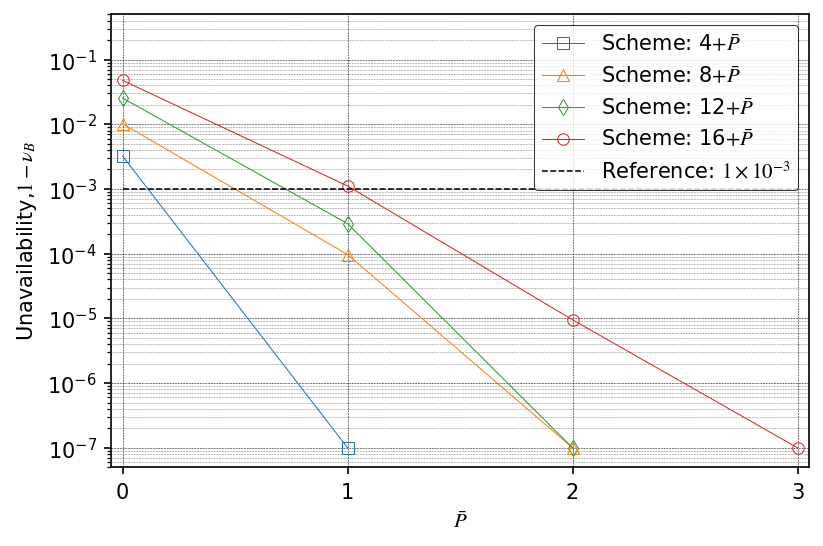

In [41]:
#N+P Unavailability Figure
fig, ax=plt.subplots(num=None, figsize=(6, 4), dpi=150, facecolor='w', edgecolor='k')
grid(color='k', linestyle='--', linewidth=.25, which='minor', alpha=0.5)
grid(color='k', linestyle='--', linewidth=.25, which='major', alpha=1)
font={'fontname':'Times','weight':'light','size':10}
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N_0=[4,8,12,16]
d=[80] 
formas=['s','^','d','o','d','>']
lineas=['-','--',':','-','--',':']

for j in range(0,len(d)):    
    for i in range(0,len(N_0)):  
        disponibilidad = genfromtxt(f'/content/SmartGatewaySelection/avai_{N_0[i]}_d_{d[j]}.csv', delimiter=',',dtype=str,autostrip=True)
        disponibilidad=np.array(disponibilidad,dtype=object)
        disponibilidad[1:,1:]=(disponibilidad[1:,1:]).astype(np.float) 
        n,k=disponibilidad.shape
        x=np.zeros((1,k-1),dtype=object)
        y1=np.zeros((1,k-1),dtype=object)
        
        for m in range(1,k):  
            x[0,m-1]=m-1
            y1[0,m-1]=1-np.prod(disponibilidad[1:,m])  
            if (y1[0,m-1]==0):
                y1[0,m-1]=1e-7
        x=x[0]
        y1=y1[0]
        esquema=r'$+\bar{P}$'
        numero=f'Scheme: {N_0[i]}'
        etiqueta=numero+esquema
        ax.semilogy(x[0:],y1[0:],f'-{formas[i]}',markersize=5.5, markerfacecolor='None'\
                    ,markeredgewidth=0.5,linewidth=0.5,label=etiqueta)
        plt.axis([-0.05, k-1.95, 5e-1,5e-8])
        xint = range(min(x), k-1) 
        plt.xticks(xint)    
        print(N_0[i])
        print(y1)
        
plt.semilogy(x,pd.Series(1-0.999, index=x),'--', linewidth=0.75,color='k',label=r'Reference: $1\times 10^{-3}$') 
plt.gca().invert_yaxis()
plt.xlabel(r'$\bar{P}$',**font)
plt.ylabel(r'Unavailability,$1-\nu_{B}$',**font)

ax.set_yscale("log")

locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

leg=plt.legend(loc='upper right',fontsize=10)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.5)
            
plt.rcParams["font.family"] = "Sans"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'stix:italic'
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

#To save the figure
#plt.savefig('/.../Unavailability.png')